# Explore Flight Delay Time of BOS and SFO in 2019
## by Bokai Xu

## Investigation Overview

> I fly in between BOS and SFO since I am a graduate student at Boston and my girl friend works at SanFrancisco. It is annoying to have a delay flight so I decided to check what influence the delay of flights.

## Dataset Overview

> This data set contains the flights delay reason and delay time of BOS and SFO from Jan. 2019 to Dec. 2019. I did some plots to figure out whether the average flight delay time is influenced by the time of flight delay. Also is there a difference of the delay pattern between Boston and San Francisco.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('flight.csv')

In [3]:
# Drop unneeded columns
df_clean=df.copy()
df_clean=df_clean[[' month', 'carrier','airport','arr_del15',' arr_delay']]

In [4]:
#Change airport column to category type
port= ['BOS','SFO']
port_type= pd.api.types.CategoricalDtype(categories= port)
df_clean['airport']= df_clean['airport'].astype(port_type)

In [5]:
#Change month column to category type
month= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
month_type= pd.api.types.CategoricalDtype(ordered=True, categories= month)
df_clean[' month']= df_clean[' month'].astype(month_type)

In [6]:
#Add average delay time column
df_clean['delay_avg']= df_clean[' arr_delay']/df_clean['arr_del15']
df_clean.dropna(inplace=True)

## (Visualization 1)

> These plots are not very meaningful. They show that how many rows in the table each airport and each month has.

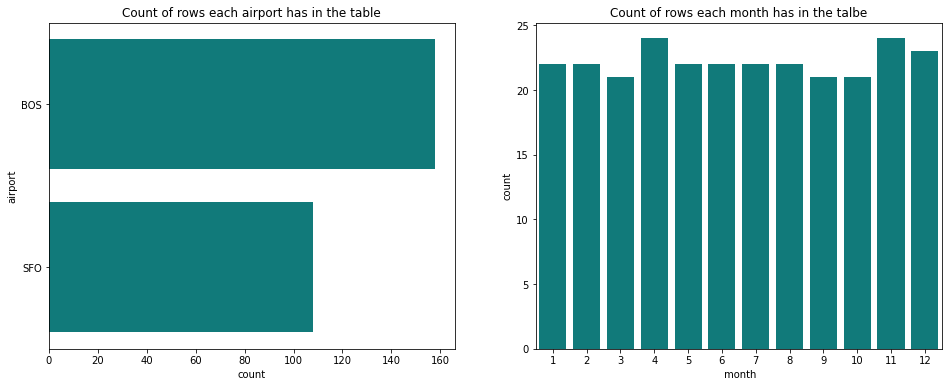

In [7]:
#I have two categorical varibales: carrier_name and year
#Just plot them to see how many rows each variables have
#It is not very meaningful
plt.figure(figsize= (16, 6))
plt.subplot(1,2,1)
sb.countplot(data= df_clean,y= 'airport',color= 'darkcyan')
plt.title('Count of rows each airport has in the table');
plt.subplot(1,2,2)
sb.countplot(data= df_clean,x= ' month', color= 'darkcyan')
plt.title('Count of rows each month has in the talbe');

## (Visualization 2)

> From these histograms of average delay time of each month we could see the average delay time most lie in 50 to 100 minutes.

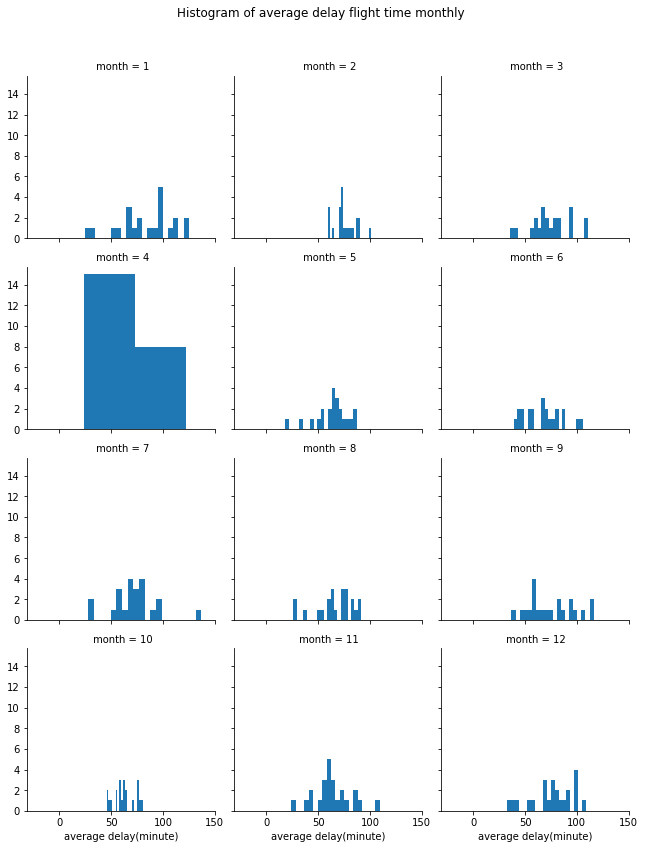

In [8]:
#Plot histogram of each carrier's delay time
g=sb.FacetGrid(data=df_clean, col=' month',col_wrap=3)
g=g.map(plt.hist,'delay_avg',bins=20)
g.fig.subplots_adjust(top=0.9) 
g.fig.suptitle('Histogram of average delay flight time monthly')
g.axes[9].set_xlabel('average delay(minute)')
g.axes[10].set_xlabel('average delay(minute)')
g.axes[11].set_xlabel('average delay(minute)')
plt.xlim(right=150);

## (Visualization 3)
> From this chart we could see in most month BOS and SFO have similar average flight delay time. In September, the average flight delay time of SFO is obviously higher than the one of BOS. In June, the average flight delay time of SFO is obviously lower than the one of BOS.


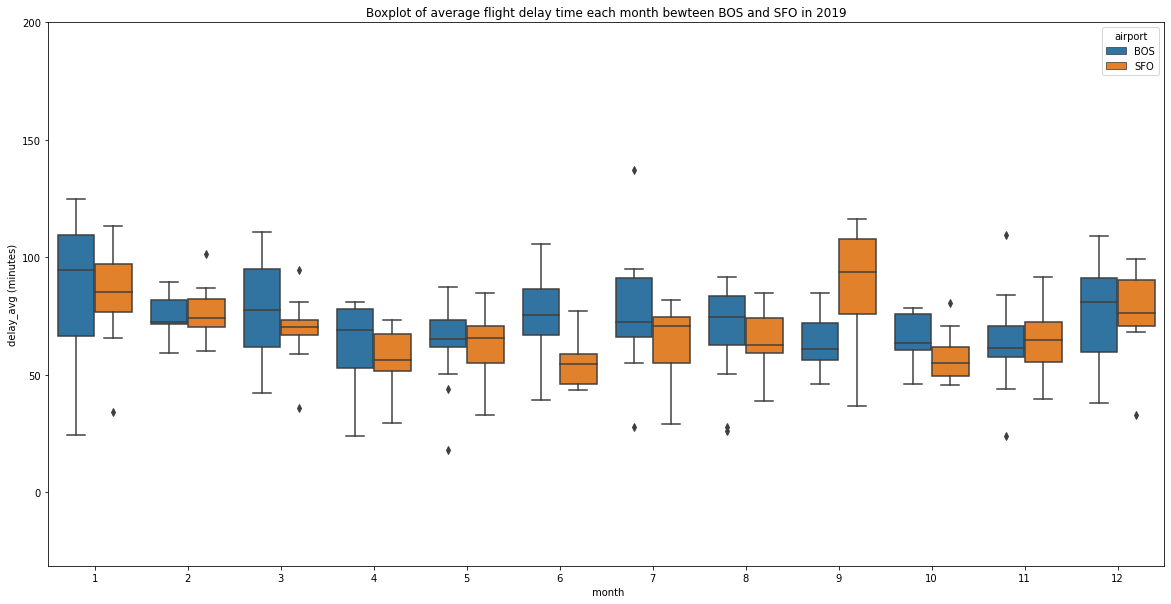

In [9]:
plt.figure(figsize=(20,10))
sb.boxplot(data=df_clean,x=' month',y='delay_avg', hue='airport')
plt.ylim(top=200)
plt.title('Boxplot of average flight delay time each month bewteen BOS and SFO in 2019')
plt.ylabel('delay_avg (minutes)');

## (Visualization 4)
> From this plot it seems that the higher the times of delay happen, the higher the average flight delay time. This is true in both BOS and SFO.

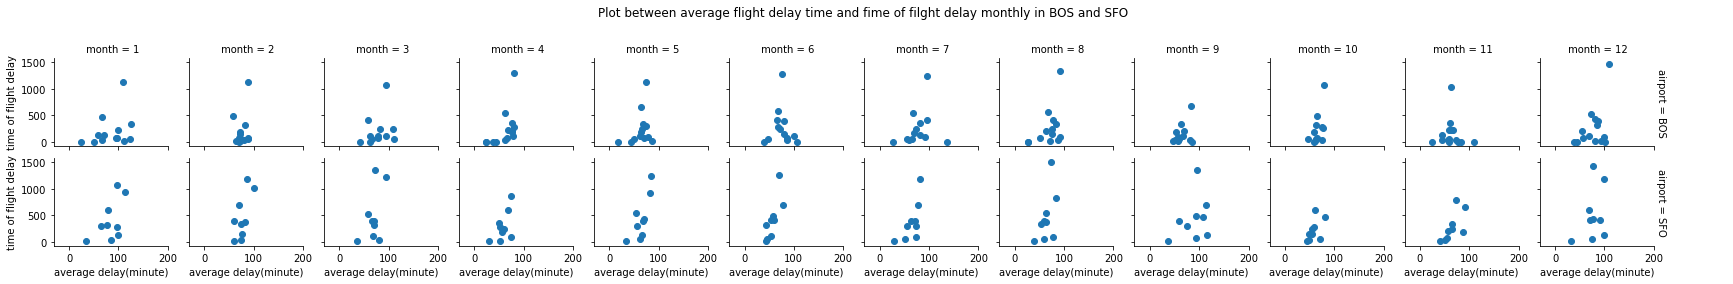

In [10]:
g=sb.FacetGrid(data=df_clean,col=' month',row='airport',height=2, margin_titles=True)
g=g.map(plt.scatter,'delay_avg','arr_del15')
g.fig.subplots_adjust(top=0.8) 
g.fig.suptitle('Plot between average flight delay time and fime of filght delay monthly in BOS and SFO')
for i in range(12):
    g.axes[1][i].set_xlabel('average delay(minute)')
g.axes[0][0].set_ylabel('time of flight delay')
g.axes[1][0].set_ylabel('time of flight delay')
plt.xlim(right=200)
g.add_legend();

I made a boxplot that compares the average flight delay time between BOS and SFO monthly. It shows the average flight delay time of BOS and SFO are similar alghough in June and September there is some major difference. Then I plot the average flight delay time and the time of filght delay monthly, it is clear to see a positive relation.
Unfortunately, there is no surprising interactions. The interaction between average delay flight time and time of delay flights are tuitive and the plot also support this positive relation.

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt